In [7]:
from Algorithms import JohnsonSP as jsp
from Algorithms import FloydSP as fsp
from Scripts import StressTest as st
from Scripts import GraphGenerator as gg
import networkx as nx
from importlib import reload

Maximum Edges 28.0
Probability to make an edge 0.5714285714285714
Edges 15
Connectivity True


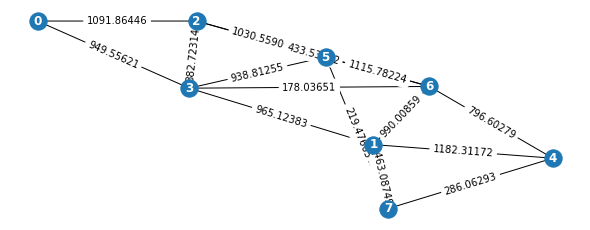

In [244]:
from Scripts import GraphGenerator as gg
n_nodes = 8
m_edges = 16
generator = gg.GraphGenerator(max_nodes=n_nodes,max_edges=m_edges)
G = generator.generate_pseudo_real_graph()
generator.draw_grapgh()

In [247]:
fsp = reload(fsp)            # if local changes

johnson = jsp.JohnsonSP(G)

floyd = fsp.FloydSP(G)

%time johnson_shortest_paths = johnson.get_path_by_dijkstra()
%time a_star_paths = johnson.get_path_by_astar(heuristic)
%time pred,dist = floyd.floyd_predecessor_and_distance()
%time floyd_shortest_paths = floyd.get_path_from_predcessor(pred)
%time nx_j_paths = nx.johnson(G)

Wall time: 1.95 ms
Wall time: 976 µs
Wall time: 977 µs
Wall time: 978 µs
Wall time: 2.93 ms


In [248]:
a_star_paths

{0: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None},
 1: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None},
 2: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None},
 3: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None},
 4: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None},
 5: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None},
 6: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None},
 7: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None}}

In [238]:
gg = reload(gg)            # if local changes
st = reload(st)

stress_tests = st.StressTest(verbose = True)
error_graphs = stress_tests.run(number_of_iterations=1000, max_nodes=100, max_edges=600, heuristic=heuristic)

/ |#                                                  | 0 Elapsed Time: 0:00:00

TypeError: object of type 'NoneType' has no len()

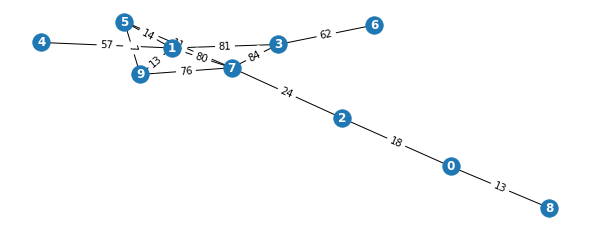

In [45]:
generator = gg.GraphGenerator(1,1)
number_of_error = 1
generator.draw_grapgh(error_graphs[number_of_error])

In [46]:
johnson = jsp.JohnsonSP(error_graphs[number_of_error])

floyd = fsp.FloydSP(error_graphs[number_of_error])

%time johnson_shortest_paths = johnson.get_path_by_dijkstra()
# %time a_star_paths = johnson.get_path_by_astar()
%time pred,dist = floyd.floyd_predecessor_and_distance()
%time floyd_shortest_paths = floyd.get_path_from_predcessor(pred)
%time nx_j_paths = nx.johnson(error_graphs[number_of_error])
%time nx_f_paths = nx.floyd_warshall(error_graphs[number_of_error])

Wall time: 0 ns
Wall time: 980 µs
Wall time: 0 ns
Wall time: 976 µs
Wall time: 1.95 ms


In [83]:
from scipy.io import mmread
a = mmread('../road-chesapeake.mtx')

In [84]:
G = nx.Graph(a)

In [5]:
import random
max_coord, min_coord = 100, 0
for i in range(len(G)):
    G.nodes[i]['coord'] = (random.randint(min_coord, max_coord), \
                           random.randint(min_coord, max_coord))

In [284]:
from Scripts import GraphGenerator as gg
n_nodes = 100
m_edges = 800
generator = gg.GraphGenerator(max_nodes=n_nodes,max_edges=m_edges)
G = generator.generate_pseudo_real_graph()
# generator.draw_grapgh()

Maximum Edges 4950.0
Probability to make an edge 0.16161616161616163
Edges 785
Connectivity True


In [287]:
import numpy as np

fsp = reload(fsp)
jsp = reload(jsp)

johnson = jsp.JohnsonSP(G)

floyd = fsp.FloydSP(G)

def heuristic(G, a, b):
    #print(G.nodes[a], G.nodes[b], a, b)
    A = G.nodes[a]['coordinate']
    B = G.nodes[b]['coordinate']
    return np.linalg.norm(np.array(list(A)) - np.array(list(B)))

%time a_star_paths = johnson.get_path_by_astar(heuristic)
%time johnson_shortest_paths = johnson.get_path_by_dijkstra()
%time pred,floyd_dist = floyd.floyd_predecessor_and_distance()
%time floyd_shortest_paths = floyd.get_path_from_predcessor(pred)
%time nx_j_paths = nx.johnson(G)

Wall time: 19.9 s
Wall time: 1.33 s
Wall time: 955 ms
Wall time: 32.2 ms
Wall time: 719 ms


In [232]:
paths_ = np.zeros((2, 2), dtype=list)

In [275]:
a_star_paths

{0: {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 3]},
 1: {0: [1, 0], 1: [1], 2: [1, 2], 3: [1, 3]},
 2: {0: [2, 0], 1: [2, 1], 2: [2], 3: [2, 3]},
 3: {0: [3, 0], 1: [3, 1], 2: [3, 2], 3: [3]}}

In [261]:
johnson_shortest_paths

{0: {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 3]},
 1: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 3]},
 2: {2: [2], 0: [2, 0], 1: [2, 1], 3: [2, 3]},
 3: {3: [3], 0: [3, 0], 1: [3, 1], 2: [3, 2]}}

In [276]:
print("{}\n{}".format(a_star_paths[0], johnson_shortest_paths[0]))
a_star_paths == johnson_shortest_paths

{0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 3]}
{0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 3]}


True

In [235]:
gg = reload(gg)            # if local changes
n_nodes = 100
m_edges = 800
generator = gg.GraphGenerator(max_nodes=n_nodes,max_edges=m_edges)
G = generator.generate_pseudo_real_graph()
# generator.draw_grapgh()

Maximum Edges 4950.0
Probability to make an edge 0.16161616161616163
Edges 785
Connectivity True


In [116]:
import copy
G_copy = copy.copy(G)

In [183]:
gg = reload(gg)            # if local changes
st = reload(st)

stress_tests = st.StressTest(verbose = True)
error_graphs = stress_tests.run(number_of_iterations = 100, max_nodes = 100, max_edges = 800, heuristic=heuristic)

/ |                         #                         | 8 Elapsed Time: 0:02:40

KeyboardInterrupt: 

In [126]:
floyd_dist[1][6]

640.8